In [250]:
%pip install pandas 
%pip install numpy
%pip instal matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "instal" - maybe you meant "install"



In [251]:
df = pd.read_csv(r"clean_GURS\new_prodaja2024.csv", sep=',', encoding='utf-8')
df.sample(10)

,mestna_cetrt,naselje,leto_izgradnje,total_m2,living_space,LETO,cena,novogradnja,house_or_apartment
2196,ČRNUČE,LJUBLJANA,1962,40.6,40.6,2024,133000,NaN,2
1680,DRAVLJE,LJUBLJANA,1970,136.4,81.4,2024,105000,NaN,1
1570,ZGORNJA ŠIŠKA,LJUBLJANA,1964,68.3,61.4,2024,229000,NaN,2
368,AJDOVŠČINA,LJUBLJANA,1939,32.2,32.2,2024,72500,NaN,2
1930,KAŠELJ,LJUBLJANA,1975,45.0,38.5,2024,145000,NaN,2
2397,ZGORNJA ŠIŠKA,LJUBLJANA,2023,85.9,75.5,2024,441738,1.0,2
979,KAŠELJ,LJUBLJANA,2022,147.2,116.6,2024,416100,1.0,2
1340,BEŽIGRAD,LJUBLJANA,1964,128.1,84.6,2024,240000,NaN,1
699,POLJANSKO PREDMESTJE,LJUBLJANA,1961,64.1,64.1,2024,280000,NaN,2
589,SLAPE,LJUBLJANA,1986,69.6,61.1,2024,267000,NaN,2


In [252]:
df.describe()

,leto_izgradnje,total_m2,living_space,LETO,cena,novogradnja,house_or_apartment
count,2556.000000,2556.000000,2556.000000,2556.0,2.556000e+03,911.000000,2556.000000
mean,1985.776213,85.224491,66.668232,2024.0,3.115533e+05,0.998902,1.895931
std,57.433082,56.111586,36.410405,0.0,4.030228e+05,0.033131,0.305410
min,23.000000,0.000000,0.000000,2024.0,2.000000e+02,0.000000,1.000000
25%,1966.000000,51.900000,43.700000,2024.0,1.850000e+05,1.000000,2.000000
50%,1985.000000,68.600000,60.000000,2024.0,2.500000e+05,1.000000,2.000000
75%,2023.000000,99.150000,79.625000,2024.0,3.581160e+05,1.000000,2.000000
max,2032.000000,570.700000,397.700000,2024.0,1.581056e+07,1.000000,2.000000


In [253]:
#preparing the year column for Power BI
# prepareing area columns and price column for Power BI
df['DATUM'] = pd.to_datetime("2024-01-01")




In [254]:
# 1) Uniform column names
df.columns = df.columns.str.lower()

# 2) Identify all object-dtype columns
str_cols = df.select_dtypes(include="object").columns

# 3) Lowercase every value in those columns
df[str_cols] = df[str_cols].apply(lambda col: col.str.lower())


In [255]:

# creating a boolean column 'NOVOGRADNJA_1' based on 'NOVOGRADNJA'
df['novogradnja_1'] = df['novogradnja'] == 1

# Preview the new column
df[['novogradnja', 'novogradnja_1']].sample(10)


,novogradnja,novogradnja_1
1811,NaN,False
793,NaN,False
1542,NaN,False
1675,NaN,False
1148,NaN,False
1097,NaN,False
281,NaN,False
1411,1.0,True
1052,1.0,True
1151,1.0,True


In [256]:
# Droping the original 'NOVOGRADNJA' column, as we now have 'NOVOGRADNJA_1' which has the same information in a boolean format.
df.drop(columns=['novogradnja'], inplace=True)

In [257]:
# Create a column 'is_house': 1 if house_or_apartment is 'house', else 0
df['is_apartment'] = (df['house_or_apartment'] == 2).astype(int)

In [258]:
# view the new column 'is house'
df[['house_or_apartment', 'is_apartment']].sample(10)


,house_or_apartment,is_apartment
1551,1,0
1689,2,1
626,2,1
261,1,0
2093,2,1
1217,2,1
2083,2,1
1329,1,0
1861,2,1
850,2,1


In [259]:
print(df['total_m2'].dtype)
print(df['living_space'].dtype)

float64
float64


In [260]:
#Printing the number of rows with missing values in 'm2_bruto' column
df[df['total_m2'].isna()]

,mestna_cetrt,naselje,leto_izgradnje,total_m2,living_space,leto,cena,house_or_apartment,datum,novogradnja_1,is_apartment


In [261]:
#Printing the number of rows with missing values in 'm2_bruto' column
df[df['total_m2']== 0]

,mestna_cetrt,naselje,leto_izgradnje,total_m2,living_space,leto,cena,house_or_apartment,datum,novogradnja_1,is_apartment
1834,volavlje,zgornja besnica,1989,0.0,0.0,2024,33000,1,2024-01-01,False,0


In [262]:
#deleting the rows with missing values in 'm2_bruto' column
#df.drop(index=1834, inplace=True)

In [263]:
#Printing the number of rows with 0 m2 in 'm2_neto' column
df[df['living_space'] == 0].count()

mestna_cetrt          10
naselje                6
leto_izgradnje        10
total_m2              10
living_space          10
leto                  10
cena                  10
house_or_apartment    10
datum                 10
novogradnja_1         10
is_apartment          10
dtype: int64

In [264]:
#Printing the number of rows with missing values in 'm2_neto' column
df[df['living_space'].isna()].count()

mestna_cetrt          0
naselje               0
leto_izgradnje        0
total_m2              0
living_space          0
leto                  0
cena                  0
house_or_apartment    0
datum                 0
novogradnja_1         0
is_apartment          0
dtype: int64

In [265]:

# 1) Replace zeros in living_space with NaN
df['living_space'] = df['living_space'].replace(0, np.nan)


In [266]:
#checking
df[df['living_space'].isna()].count()

mestna_cetrt          10
naselje                6
leto_izgradnje        10
total_m2              10
living_space           0
leto                  10
cena                  10
house_or_apartment    10
datum                 10
novogradnja_1         10
is_apartment          10
dtype: int64

In [267]:
# filling missing values in 'm2_neto' using DataFrame syntax
df.fillna({'living_space': df['total_m2']}, inplace=True)

In [268]:
# trying to unify sizes of apartments and houses based on total area bought
def oceni_sobnost(m2):
    if pd.isna(m2):
        return None
    if m2 < 35:
        return 1
    elif m2 < 50:
        return 2
    elif m2 < 70:
        return 3
    elif m2 < 90:
        return 4
    elif m2 < 110:
        return 5
    else:
        return 6

In [269]:
df['sobnost_ocenjena'] = df['total_m2'].apply(oceni_sobnost)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mestna_cetrt        2556 non-null   object        
 1   naselje             2546 non-null   object        
 2   leto_izgradnje      2556 non-null   int64         
 3   total_m2            2556 non-null   float64       
 4   living_space        2556 non-null   float64       
 5   leto                2556 non-null   int64         
 6   cena                2556 non-null   int64         
 7   house_or_apartment  2556 non-null   int64         
 8   datum               2556 non-null   datetime64[ns]
 9   novogradnja_1       2556 non-null   bool          
 10  is_apartment        2556 non-null   int64         
 11  sobnost_ocenjena    2556 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 222.3+ KB


In [271]:
# checking all the zero values in the 'naselje' column and replacing them with NaN
df.loc[df['naselje'] == 0, 'naselje'] = np.nan

In [272]:
# checking all the empty values in the 'naselje' column
df[df['naselje'].isna()].count()

mestna_cetrt          10
naselje                0
leto_izgradnje        10
total_m2              10
living_space          10
leto                  10
cena                  10
house_or_apartment    10
datum                 10
novogradnja_1         10
is_apartment          10
sobnost_ocenjena      10
dtype: int64

In [273]:
# changing all the empty values in the 'naselje' column to 'ljubljana'
df.fillna({'naselje': 'ljubljana'}, inplace=True)

In [274]:
df['price_per_m2'] = df['cena'] / df['total_m2']


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mestna_cetrt        2556 non-null   object        
 1   naselje             2556 non-null   object        
 2   leto_izgradnje      2556 non-null   int64         
 3   total_m2            2556 non-null   float64       
 4   living_space        2556 non-null   float64       
 5   leto                2556 non-null   int64         
 6   cena                2556 non-null   int64         
 7   house_or_apartment  2556 non-null   int64         
 8   datum               2556 non-null   datetime64[ns]
 9   novogradnja_1       2556 non-null   bool          
 10  is_apartment        2556 non-null   int64         
 11  sobnost_ocenjena    2556 non-null   int64         
 12  price_per_m2        2556 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64

In [276]:
df.describe()

c:\Users\gaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,leto_izgradnje,total_m2,living_space,leto,cena,house_or_apartment,datum,is_apartment,sobnost_ocenjena,price_per_m2
count,2556.000000,2556.000000,2556.000000,2556.0,2.556000e+03,2556.000000,2556,2556.000000,2556.000000,2556.000000
mean,1985.776213,85.224491,67.139045,2024.0,3.115533e+05,1.895931,2024-01-01 00:00:00,0.895931,3.673318,inf
min,23.000000,0.000000,0.000000,2024.0,2.000000e+02,1.000000,2024-01-01 00:00:00,0.000000,1.000000,2.941176
25%,1966.000000,51.900000,43.975000,2024.0,1.850000e+05,2.000000,2024-01-01 00:00:00,1.000000,3.000000,3008.700795
50%,1985.000000,68.600000,60.100000,2024.0,2.500000e+05,2.000000,2024-01-01 00:00:00,1.000000,3.000000,3732.280652
75%,2023.000000,99.150000,80.025000,2024.0,3.581160e+05,2.000000,2024-01-01 00:00:00,1.000000,5.000000,4545.454545
max,2032.000000,570.700000,397.700000,2024.0,1.581056e+07,2.000000,2024-01-01 00:00:00,1.000000,6.000000,inf
std,57.433082,56.111586,36.572676,0.0,4.030228e+05,0.305410,NaN,0.305410,1.570050,NaN


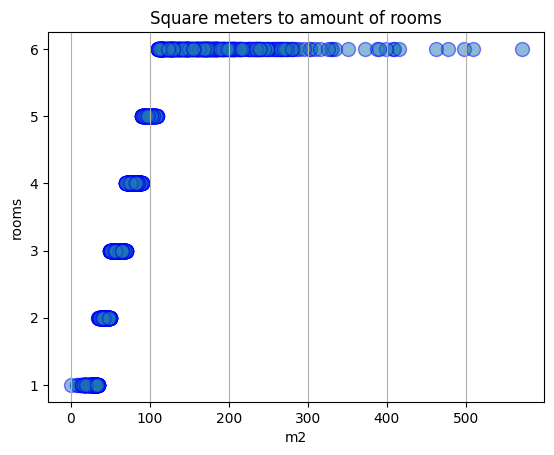

In [277]:
# looking at graphs
plt.scatter(data=df, x='total_m2', y='sobnost_ocenjena', s=100, alpha=0.5, edgecolors='blue' )
plt.title('Square meters to amount of rooms')
plt.xlabel("m2")
plt.ylabel("rooms")
plt.grid( axis= 'x')
plt.show()


In [278]:
df['price_per_m2'].describe()

c:\Users\gaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    2556.000000
mean             inf
std              NaN
min         2.941176
25%      3008.700795
50%      3732.280652
75%      4545.454545
max              inf
Name: price_per_m2, dtype: float64

In [279]:
#cleaning the data of excessive outliers
# 1. Izračun kvartilov za stolpec 'price'
Q1 = df['price_per_m2'].quantile(0.25)
Q3 = df['price_per_m2'].quantile(0.75)
IQR = Q3 - Q1

# 2. Meje za izločanje outlierjev
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filtriranje vrstic brez outlierjev
df_cut =df[(df['price_per_m2'] >= lower_bound) & (df['price_per_m2'] <= upper_bound)].copy()


comment: after we cut extreme low and high values, most of the real estate falls in price between what looks like 1400 per m2 and just below 2000m2.

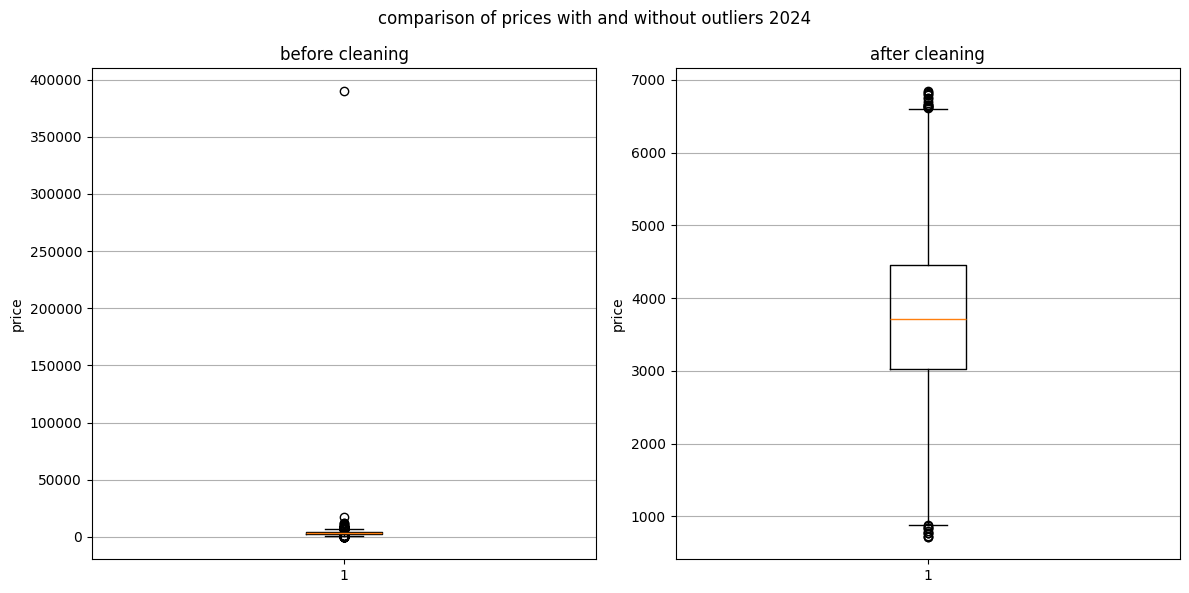

In [280]:
# 🔲 Subplot postavitev
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 vrstica, 2 stolpca

# Boxploti
axes[0].boxplot(df['price_per_m2'])
axes[0].set_title("before cleaning")
axes[0].set_ylabel("price")
axes[0].grid(axis='y')

axes[1].boxplot(df_cut["price_per_m2"])
axes[1].set_title("after cleaning")
axes[1].set_ylabel("price")
axes[1].grid(axis='y')



plt.suptitle("comparison of prices with and without outliers 2024")

plt.tight_layout()
plt.show()

In [281]:
"""
#do a heatmap of the data
import seaborn as sns   
plt.figure(figsize=(12, 8))
# Select only numeric columns for the heatmap
numeric_cols = df_cut[['leto_izgradnje', 'total_m2', 'living_space', 'cena', 'is_apartment', 'price_per_m2', 'novogradnja_1']]
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Real Estate Data')
"""

'\n#do a heatmap of the data\nimport seaborn as sns   \nplt.figure(figsize=(12, 8))\n# Select only numeric columns for the heatmap\nnumeric_cols = df_cut[[\'leto_izgradnje\', \'total_m2\', \'living_space\', \'cena\', \'is_apartment\', \'price_per_m2\', \'novogradnja_1\']]\nsns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap=\'coolwarm\', linewidths=.5)\nplt.title(\'Correlation Heatmap of Real Estate Data\')\n'

In [282]:
df_cut.describe()

,leto_izgradnje,total_m2,living_space,leto,cena,house_or_apartment,datum,is_apartment,sobnost_ocenjena,price_per_m2
count,2415.000000,2415.000000,2415.000000,2415.0,2.415000e+03,2415.000000,2415,2415.000000,2415.000000,2415.000000
mean,1985.564389,82.700414,65.027702,2024.0,2.822910e+05,1.902692,2024-01-01 00:00:00.000000256,0.902692,3.618634,3700.608025
min,23.000000,7.800000,7.800000,2024.0,2.000000e+04,1.000000,2024-01-01 00:00:00,0.000000,1.000000,718.390805
25%,1966.000000,51.450000,43.500000,2024.0,1.892545e+05,2.000000,2024-01-01 00:00:00,1.000000,3.000000,3028.691167
50%,1984.000000,67.700000,58.700000,2024.0,2.496630e+05,2.000000,2024-01-01 00:00:00,1.000000,3.000000,3714.285714
75%,2023.000000,95.200000,77.000000,2024.0,3.428590e+05,2.000000,2024-01-01 00:00:00,1.000000,5.000000,4459.176332
max,2024.000000,570.700000,397.700000,2024.0,3.281312e+06,2.000000,2024-01-01 00:00:00,1.000000,6.000000,6850.533808
std,57.502421,52.672118,33.165934,0.0,1.671399e+05,0.296439,NaN,0.296439,1.544126,1151.421413


In [283]:
df.sample(10)

,mestna_cetrt,naselje,leto_izgradnje,total_m2,living_space,leto,cena,house_or_apartment,datum,novogradnja_1,is_apartment,sobnost_ocenjena,price_per_m2
1253,šentpeter,ljubljana,2023,23.3,23.3,2024,179000,2,2024-01-01,True,1,1,7682.403433
1922,zgornja šiška,ljubljana,2023,110.8,100.5,2024,519081,2,2024-01-01,True,1,6,4684.846570
2187,črnuče,ljubljana,2023,86.0,74.2,2024,319411,2,2024-01-01,True,1,4,3714.081395
236,tabor,ljubljana,2022,55.2,55.2,2024,226315,2,2024-01-01,True,1,3,4099.909420
1711,zgornja šiška,ljubljana,2023,43.8,21.6,2024,155134,2,2024-01-01,True,1,2,3541.872146
1281,zelena jama,ljubljana,1962,54.9,42.6,2024,75000,2,2024-01-01,False,1,3,1366.120219
2128,dravlje,ljubljana,1971,62.1,58.0,2024,7608,2,2024-01-01,False,1,3,122.512077
1449,zgornja šiška,ljubljana,2023,100.7,90.7,2024,500000,2,2024-01-01,True,1,5,4965.243297
1992,zgornja šiška,ljubljana,1968,81.6,81.6,2024,315000,2,2024-01-01,False,1,4,3860.294118
570,zgornja šiška,ljubljana,2023,78.5,37.8,2024,280740,2,2024-01-01,True,1,4,3576.305732


In [ ]:
df_cut.to_csv(r"power_bi_ready\gurs_cut\realestate_2024.csv", index=False, encoding='utf-8')